In [1]:
from cupbearer import utils, data, detectors, tasks, models, scripts

/Users/oliverdaniels-koch/miniforge3/envs/cupbearer/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
task = tasks.measurement_tampering(task_name="diamonds", device="mps")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Filter: 100%|██████████| 25000/25000 [00:00<00:00, 127101.05 examples/s]


In [3]:
for name, _ in task.model.named_modules():
    print(name)


hf_model
hf_model.sensor_probes
hf_model.sensor_probes.0
hf_model.sensor_probes.1
hf_model.sensor_probes.2
hf_model.aggregate_probe
hf_model.transformer
hf_model.transformer.wte
hf_model.transformer.drop
hf_model.transformer.h
hf_model.transformer.h.0
hf_model.transformer.h.0.ln_1
hf_model.transformer.h.0.attn
hf_model.transformer.h.0.attn.attn_dropout
hf_model.transformer.h.0.attn.resid_dropout
hf_model.transformer.h.0.attn.qkv_proj
hf_model.transformer.h.0.attn.out_proj
hf_model.transformer.h.0.mlp
hf_model.transformer.h.0.mlp.fc_in
hf_model.transformer.h.0.mlp.fc_out
hf_model.transformer.h.0.mlp.act
hf_model.transformer.h.0.mlp.dropout
hf_model.transformer.h.1
hf_model.transformer.h.1.ln_1
hf_model.transformer.h.1.attn
hf_model.transformer.h.1.attn.attn_dropout
hf_model.transformer.h.1.attn.resid_dropout
hf_model.transformer.h.1.attn.qkv_proj
hf_model.transformer.h.1.attn.out_proj
hf_model.transformer.h.1.mlp
hf_model.transformer.h.1.mlp.fc_in
hf_model.transformer.h.1.mlp.fc_out
hf

In [4]:
names = [
    "hf_model.transformer.ln_f.output"
]

In [5]:
detector = detectors.MahalanobisDetector(names, layer_aggregation="mean")

/Users/oliverdaniels-koch/miniforge3/envs/cupbearer/lib/python3.10/site-packages/transformers/models/codegen/modeling_codegen.py:71: UserWarning: MPS: no support for int64 repeats mask, casting it to int32 (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/mps/operations/Repeat.mm:236.)
  sin = torch.repeat_interleave(sin[:, :, None, :], 2, 3)
100%|██████████| 2500/2500 [35:27<00:00,  1.18it/s] 
2024-05-26 02:14:30.064 | INFO     | cupbearer.detectors.anomaly_detector:eval:152 - AUC_ROC (all): 0.7301
2024-05-26 02:14:30.071 | INFO     | cupbearer.detectors.anomaly_detector:eval:153 - AP (all): 0.7022


(defaultdict(dict,
             {'all': {'AUC_ROC': 0.7301009625361973,
               'AP': 0.7021960002106683}}),
 {'all': <Figure size 640x480 with 1 Axes>})

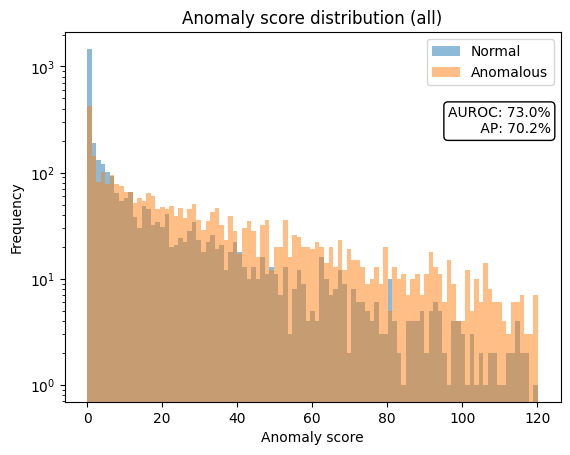

In [6]:
scripts.train_detector(
    task, detector, save_path=None, eval_batch_size=2, batch_size=2
)